## Intro

Last week you had an intro to classification tasks and decision trees. You worked on a model to predict criminal recidivism and made a few visualizations along the way. 

Some of you asked: why Machine Learning? And, even though modeling is part of analysing data and predictions are a huge part of how people use data nowadays, there is something more important to it: visualization are not only powerful to study data, they are also great to understand models. We needed that little extra Machine Learning to explore another way of using visualizations. 

Today, we will do exactly this! The purpose of today's class is threefold: 

1. To explore the data I gave you last week with **interactive visualizations**;
2. To **visualize the results** on criminal recidivism of your machine learning model;
3. To **debias** the results you obtained via two methods (and a bit of visualization along the way). 

## Part 1: Interactive visualizations with Bokeh

Until today we have worked with static data visualization. However, exploratory data analysis means to be able to explore the multi-faceted nature of data and *interactive dataviz* is a handy tool to do it! It allows to play with the data: Toggle the view. Zoom. Drag. Show more details. All those things. Those are a key part of modern data visualization. 

To really master interactive visualizations, you should check out methods in JavaScript, especially [D3](https://d3js.org). Given that we only have 5ECTS for this class, we unfortunately don't have time for that. But luckily Python has some pretty good options for interactive visualizations. [Here](https://mode.com/blog/python-interactive-plot-libraries/), you can find some of them.

Today, we'll explore [`Bokeh`](https://docs.bokeh.org/en/latest/), which provides lots of nice interactive funtionalities to Python. To work with Bokeh, we first need to do some preparation:
1. If you haven't installed it yet please do so. You can simply follow [these steps](https://docs.bokeh.org/en/latest/docs/first_steps/installation.html)
2. To include Bokeh in your notebooks you can follow the [Bokeh: Using with Jupyter](https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html#userguide-jupyter-notebook) guide. Come back to this one when you need it
3. We aim to give you a gentle start with Bokeh and I am going to include more example codes than usual in the follwing. However, to get a sense of how things work, I suggest you surf the web, find a Bokeh tutorial and scan through it. Also click around a bit in [the official docs](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide).

In the exercises below, we will use the data from [GitHub](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv):
1. Load the data and select the columns as in Week 6, Exercise 3.1
2. Preprocess the data as in Week 6, Exercise 3.2.

Ok, let's get started!

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Legend, HoverTool, Title
from bokeh.io import output_notebook, show

In [2]:
# import data
recidivism = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv')

In [3]:
# preprocess data

# 0. drop all columns except 'age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'is_recid',
#                            'days_b_screening_arrest', 'c_charge_degree', 'two_year_recid'

recidivism = recidivism[['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'is_recid',
                         'days_b_screening_arrest', 'c_charge_degree', 'two_year_recid']]

# 1. filter out records where the `is_recid` feature is not known (i.e. where it is equal to -1)

recidivism = recidivism.drop(recidivism[recidivism.is_recid == -1].index)

# 2. only keep records that cause jail time

recidivism = recidivism.drop(recidivism[recidivism.c_charge_degree == 'O'].index)

# 3. only keep records that have between $-30$ and $30$ days between the arrest and screening

recidivism = recidivism.drop(recidivism[(recidivism.days_b_screening_arrest <= -30) | (recidivism.days_b_screening_arrest >= 30) | \
    (recidivism.days_b_screening_arrest.isna())].index)

# 4. drop `is_recid`, `c_charge_degree`, `days_b_screening_arrest` for the upcoming analysis

recidivism = recidivism.drop(columns = ['is_recid', 'c_charge_degree', 'days_b_screening_arrest'])

> *Exercise 1.1:* Interactive data exploration. The aim of this exercise is to compare bar plots for different races. Each bar plot will have age on the x-axis and number of samples in the data on the y-axis. Follow the steps below for success:
>
> * Compute the number of samples by age for each race. You should end up with a dataframe that looks like [this](https://github.com/suneman/socialdata2022/blob/main/files/bokeh-df1.png).
> * Convert your `DataFrame` to Bokeh `ColumnDataSource`.
> * Create an empty figure, you can find the a guide to define a figure in Bokeh online. Here, a little help:
> ```python
p = figure(ADD_PARAMS_HERE) #p is a standard way to call figures in Bokeh
#do not forget to add attributes to the figure, e.g. title, axis names, etc.
> ```
> * Add bars by using `p.vbar()` as follows:
> ```python
    bar ={} # to store vbars 
    # here we will do a for loop to create a bar for each race
    for indx,i in enumerate(races):
         bar[i] = p.vbar(x=ADD_AGE_COLUMN_NAME,  top=i, source= ADD_YOUR_DATA, legend_label=i, ..., muted = ...) 
> ```
> * Make your legend interactive and display the figure:
> ```python
    p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide')
    show(p) #displays your plot
> ```
> * You will notice that the legend appears in the middle of the figure (and it ocludes some of the data). In order to fix this look into [this guide](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot) as a start. Below are some code snippets that you can use to deal with this problem (but read the guide first):
> ```python
    items = [] # for the custom legend // you need to figure out where to add it
    items.append((i, [bar[i]])) # figure out where to add it
    legend = Legend(items=..., location=.....) # figure out where to add it
    p.add_layout(...., ...) # figure where to add it
    # if you read the guide, it will make sense :)
> ```
> * And now you have it! You can play with colors and other parameters to make it as you like, but first describe your plot. What do you observe?

In [4]:
# Exercise 1.1 Preprocessing

# Compute the number of samples by age for each race

recidivism_by_age_each_race = recidivism.groupby(['age', 'race']).agg({'sex':'count'}).sort_values(by=['age', 'race'])\
    .rename(columns={'sex':'Counts'}).reset_index()

recidivism_by_age_each_race = recidivism_by_age_each_race.pivot(index = 'age', columns='race', values = 'Counts').reset_index()

# Convert your `DataFrame` to Bokeh `ColumnDataSource`.
recidivism_by_age_each_race = ColumnDataSource(recidivism_by_age_each_race)

In [323]:
# Exercise 1.1 Plotting

# Create an empty Bokeh figure
p = figure(title = 'Number of People who recomitted a Crime by Age')

# create the bar chart (task to move the legend is commeted out as not needed)

bar = {}
# items = []
for indx,i in enumerate(np.unique(recidivism['race'].values)):
    bar[i] = p.vbar(x='age',  top=i, source= recidivism_by_age_each_race, legend_label=i, muted = True)
    # items.append((i, [bar[i]])) 

p.legend.click_policy="mute"
# legend = Legend(items=items, location=(10, -25))
# p.add_layout(legend, 'right')
p.add_layout(Title(text="Age", align="center"), "below")
p.add_layout(Title(text="Count", align="center"), "left")

show(p)
output_notebook()

del bar, i, indx, p, recidivism_by_age_each_race #, items, legend

KeyError: 'race'

**What do you observe?**
- barely any native american or asian people
- african american, caucasian -> skewed to the left -> so more young people (hispanics similar trend, but not as clearly)
- the more crimes the clearer the distribution

---
During Week 6 I asked you to visualize a bar plot with the fraction of recommitted crimes over total number of records per race, e.g. the number of recommitted crimes of African-Americans over the total number of crimes of African-Americans, etc. You should have obtained something like [this](https://github.com/suneman/socialdata2022/blob/main/files/frac_recommit_race.png). If we look at this plot we observe that all races but Asian have fraction of recommitted crimes above $30\%$, and African-Americans have the highest fraction, i.e. above $50\%$. However, is this the whole story? Let's have a look at this data from a different angle!

> *Exercise 1.2:* fraction of crimes - a different perspective. In this exercise, we are going to create an interactive scatter plot, where each point is a race, with position given by the number of total samples in the race category on the x-axis and the number of recommitted crimes in the race category on the y-axis. Moreover, each point will have a size given by the fraction computed in Week 6. Follow these steps for success:
> * Create a `DataFrame` with `race` as index and the following columns: 
>     * `n_samples`, i.e. number of samples for each race,
>     * `n_rec_crimes`, i.e. number of recommitted crimes for each race,
>     * `frac_crimes`, i.e. `n_rec_crimes/n_samples`.
> * Convert the dataframe into a `ColumnDataSource` and create an empty figure.
> * Add points in your figure by using 
> ```python
>   p.circle(ADD_X_COLUMN,ADD_Y_COLUMN, size=..., source=..., ...)
> ```
> * Add a `HoverTool()` so that when hovering over a circle both race and size are displayed.
> * You can change colors of the data points by passing an additional color column to `p.circle()`.
> * And now a couple of questions: Explain what you observe. What does this plot shows that the fraction of crimes alone didn't? Do you think the data we are using is representative? What could be some possible issues with this data? 

Once answered the questions above, **take a minute and discuss** your thoughts with your neighbour or one of your group members.

In [6]:
# Exercise 1.2

# Preprocessing -> create the dataframe
recidivism_race = recidivism.groupby(['race', 'two_year_recid']).agg({'two_year_recid':'count'}).\
    rename(columns={'two_year_recid':'Count'}).reset_index()

n_samples = recidivism_race.groupby(['race']).agg({'Count':'sum'}).rename(columns={'Count':'n_samples'}).reset_index()
n_rec_crimes = recidivism_race[recidivism_race['two_year_recid'] == 1].rename(columns={'Count':'n_rec_crimes'})

recidivism_race = pd.concat([n_rec_crimes.set_index('race'),n_samples.set_index('race')], axis=1, join='inner')

recidivism_race['frac_crimes'] = (recidivism_race['n_rec_crimes']/ recidivism_race['n_samples'])*100
recidivism_race = recidivism_race.drop(columns = ['two_year_recid'])

index = recidivism_race.index

recidivism_race = recidivism_race = ColumnDataSource(recidivism_race)
recidivism_race.add(index, 'race')

del n_rec_crimes, n_samples, index

In [7]:
# Exercise 1.2

# plotting

p = figure(tools='hover', title = 'Fraction of Recomitted Crimes by Race')

p.circle('n_samples','n_rec_crimes', size = 'frac_crimes', source= recidivism_race)

hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("Race", "@race"),
    ("Fraction of total Crimes [%]", "@frac_crimes"),
    ]

p.add_layout(Title(text="Number of Samples for each Race", align="center"), "below")
p.add_layout(Title(text="Number of recommitted Crimes by each Race", align="center"), "left")

# add HoverTool() ->   when hovering over a circle both race and size are displayed

show(p)
output_notebook()

del hover, p, recidivism_race

Loading BokehJS ...

**Exercise 1.2 Explain what you observe.**
<br> What does this plot shows that the fraction of crimes alone didn't? -> the amount of crimes
<br> Do you think the data we are using is representative? -> not for all races
<br> What could be some possible issues with this data? -> sample size for some races to small

<details>
    <summary>Ok, it is now time to uncover where this data is coming from. <b>Only click on this cell to open it after you have completed the exercise above</b></summary>
    The data we are using is related to:
    <ul>
        <li> <b>COMPAS</b> (Correctional Offender Management Profiling for Alternative Sanctions), a <a href=https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751>popular commercial algorithm</a> used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).  </li>
        <li> Multiple works have shown that the algorithm is biased towards non-caucasian people. <b>ProPublica</b> has published an <a href=https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm>extensive work</a> on the topic. </li>
    </ul>
</details>

## Part 2: Visualize the results of a Machine Learning model

Above, we had a deeper look at the recidivism dataset and the visualizations we created highlighted some possible issues/imbalances with the data and especially with race. 

If you had a look at the hidden information cell above, now you know what the problems are with this dataset and with using it to predict recidivism. During Week 6, you trained a classification model to predict criminal recidivism on this data. Now, a question might rise... Is your model biased? If yes, can you do anything about it?

You will now use visualization to better understand the results of your model. This is one of the reasons why visualization is so powerful. Not only it allows us to explore data and create an understanding of the different aspects of it, but it also allows us to understand ML models and their performance!

In the next exercise, use the model you have trained/tested in Week 6 by using only the columns selected in Week 6, Exercise 3.1 and by preprocessing as in Exercise 3.2.

> *Exercise 2:* Evaluating the quality of predictions. One of the simplest ways to get a glimpse into the performance of an classification model is to look at the [Confustion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).
>
> * Create a confusion matrix that evaluates the performance of your model. What do you observe?
> * Now, create a confusion matrix for specific groups:
>    * Take targets and predictions only for *Caucasians*,
>    * Take targets and predictions only for *African-Americans*.
>    * Create a confusion matrix for each group. What do you see when you compare the two confusion matrices? Explain in your own words how this might affect the overall fairness of your model.

Again, after giving an answer to the questions above, **take a minute and discuss** your thoughts with your neighbour or one of your group members.

<details>
    <summary> Exercise 2 interpretation hint <b>(Only open after you have completed the exercise above)</b></summary>
    <ul>
        <li>It seems that our model has higher number of <b>False-Positives</b> or <b>False-Negatives</b> for different groups of people. Go back to Exercise 2 if you did not spot this difference and think at the related implication. </li>
      <li>Several researchers also noticed this issue. The following essay by Ellora Thadaney Israni describes the potential issues with the algorithm and data: <a href = https://www.nytimes.com/2017/10/26/opinion/algorithm-compas-sentencing-bias.html> When an Algorithm Helps Send You to Prison </a> (If you don't have access to it you can find the article on DTU Learn -> Course Content -> Content -> Lecture 7 reading)</li>
    </ul>
</details>

In [8]:
# Week 6: 3.2.3 Feature Engineering -> one hot encoding applied on the race column and label encoding on the sex column

# Get one hot encoding of column race
one_hot = pd.get_dummies(recidivism['race'], prefix = 'race')
# Drop column race as it is now encoded
recidivism = recidivism.drop('race',axis = 1)
# Join the encoded df
recidivism = recidivism.join(one_hot)

# label encoding on the sex column (0 -> Female; 1 -> Male)
recidivism['sex'] = recidivism['sex'].astype('category')
recidivism['sex'] = recidivism['sex'].cat.codes

In [9]:
# Week 6: Exercise 3.3

# 3.3.1

# a)
# split the data set in train and test set (70/30 split) -> balanced data set grab equal amount of each target value
# train_test_split by sklearn

X = recidivism.loc[:, ~recidivism.columns.isin(['two_year_recid'])]
#0 = defendant did not recommit a crime within two years; 1 = the defendant recommitted a crime within two years
y = recidivism['two_year_recid']

from sklearn.model_selection import train_test_split 
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42) 

# to check if equal amount of each target value
print('Check if equal samples of each target value:')
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

# b)
# fit randomforest or DecisionTreeClassifier

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rf.fit(X_train, y_train)

# 3.3.2

# Are your results tied to the specific training data/hyperparameter set you used? -> I guess

# feature importance
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print('Feature importance of 1. Random Forest Classifier Model: ')
print(feature_imp) 
# drop features with low importance -> X = recidivism.loc[:, recidivism.columns.isin(['age', 'priors_count'])] might be enough

# prediction (needs to be rounded, so its similar to the features again)
y_pred=rf.predict(X_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error of 1. Random Forest Classifier Model:', round(np.mean(errors), 2), 'degrees.')

from sklearn import metrics
print("Accuracy of 1. Random Forest Classifier Model:",metrics.accuracy_score(y_test, y_pred).round(2))

# precision and recall
print('Classification Report of 1. Random Forest Classifier Model')
print(metrics.classification_report(y_test, y_pred))

# !!! Confusion matrix would be also helpful !!!

# 3.2.3 Results toed to specific training data/ hyperparameter set?

# RandomizedSearchCV -> recompute the performance metric above with the hyperparameters found

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)


# Random Hyperparameter Grid

# Number of trees in random forest (current random forest model n_estimators = 1000)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 1000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_reg = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42\
    , n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print('Best parameters based on RandomizedSearchCV: ')
print(rf_random.best_params_)

### Evaluate Random Search

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(2)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of the model based on RandomizedSearchCV {:0.2f}%.'.format(100 * (random_accuracy - base_accuracy) / base_accuracy))

# Week 6: continuation of 3.2.3

print(f'parameters for param_grid: {rf_random.best_params_}')

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4],
    'min_samples_split': [2],
    'n_estimators': [1740]
}
# Create a based model
rf_grid = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of the model based on GridSearchCV {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Check if equal samples of each target value:
(array([0, 1], dtype=int64), array([1962, 1962], dtype=int64))
(array([0, 1], dtype=int64), array([841, 841], dtype=int64))
Feature importance of 1. Random Forest Classifier Model: 
age                      0.522835
priors_count             0.321437
juv_other_count          0.034528
sex                      0.028832
juv_misd_count           0.024872
race_African-American    0.021073
juv_fel_count            0.018079
race_Caucasian           0.010978
race_Hispanic            0.008155
race_Other               0.006027
race_Asian               0.001970
race_Native American     0.001216
dtype: float64
Mean Absolute Error of 1. Random Forest Classifier Model: 0.38 degrees.
Accuracy of 1. Random Forest Classifier Model: 0.62
Classification Report of 1. Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       841
           1       0.63      0.60      0.61       841

   

In [10]:
# Exercise 2: Confusion Matrix

# 2.1 Create a confusion matrix that evaluates the performance of your model. What do you observe?

from sklearn.metrics import confusion_matrix

y_pred_random = rf_random.predict(X_test)
y_pred_grid = best_grid.predict(X_test)


print('best grid: ')
print(confusion_matrix(y_test, y_pred_grid))
print(pd.crosstab(y_pred_grid, y_test)) # rows predicted, columns actual values (https://www.youtube.com/watch?v=42JGBd6zh8E)

print('random: ')
print(confusion_matrix(y_test, y_pred_random))
print(pd.crosstab(y_pred_random, y_test))

best grid: 
[[567 274]
 [303 538]]
two_year_recid    0    1
row_0                   
0               567  303
1               274  538
random: 
[[561 280]
 [300 541]]
two_year_recid    0    1
row_0                   
0               561  300
1               280  541


**Exercise 2.1: Confusion Matrix: What do you observe?**
<br> quite a lot of Type 1 and Type 2 Errors

In [86]:

# 2.2 create a confusion matrix for specific groups:
# 2.2.1 ake targets and predictions only for *Caucasians*,

# a)
# split the data set in train and test set (70/30 split) -> balanced data set grab equal amount of each target value
# train_test_split by sklearn

X_Caucasians = recidivism[recidivism.race_Caucasian == 1]
X_Caucasians = X_Caucasians.drop(columns = ['two_year_recid'])
#0 = defendant did not recommit a crime within two years; 1 = the defendant recommitted a crime within two years
y_Caucasians = recidivism[recidivism.race_Caucasian == 1]
y_Caucasians = y_Caucasians['two_year_recid']

rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_Caucasians, y_Caucasians)

X_Caucasians_train, X_Caucasians_test, y_Caucasians_train, y_Caucasians_test = train_test_split(X_res, y_res, test_size=0.3, \
    stratify=y_res, random_state=42) 

# to check if equal amount of each target value 
print(np.unique(y_Caucasians_train, return_counts=True))
print(np.unique(y_Caucasians_test, return_counts=True))

y_Caucasians_pred_random = rf_random.predict(X_Caucasians_test)
y_Caucasians_pred_grid = best_grid.predict(X_Caucasians_test)

print('Caucasians best grid: ')
print(confusion_matrix(y_Caucasians_test, y_Caucasians_pred_grid))
print(pd.crosstab(y_Caucasians_test, y_Caucasians_pred_grid, rownames=['Actual'], colnames=['Predicted']))

print('Caucasians random: ')
print(confusion_matrix(y_Caucasians_test, y_Caucasians_pred_random))
print(pd.crosstab(y_Caucasians_test, y_Caucasians_pred_random, rownames=['Actual'], colnames=['Predicted']))


#######

# 2.2.2 Take targets and predictions only for *African-Americans*.

X_African_American = recidivism.loc[recidivism['race_African-American'] == 1]
X_African_American = X_African_American.drop(columns = ['two_year_recid'])
#0 = defendant did not recommit a crime within two years; 1 = the defendant recommitted a crime within two years
y_African_American = recidivism.loc[recidivism['race_African-American'] == 1]
y_African_American = y_African_American['two_year_recid']

rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_African_American, y_African_American)

X_African_American_train, X_African_American_test, y_African_American_train, y_African_American_test = \
    train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42) 

# to check if equal amount of each target value
print(np.unique(y_African_American_train, return_counts=True))
print(np.unique(y_African_American_test, return_counts=True))

y_African_American_pred_random = rf_random.predict(X_African_American_test)
y_African_American_pred_grid = best_grid.predict(X_African_American_test)

print('African_American best grid: ')
print(confusion_matrix(y_African_American_test, y_African_American_pred_grid))
print(pd.crosstab(y_African_American_test, y_African_American_pred_grid, rownames=['Actual'], colnames=['Predicted']))

print('African_American random: ')
print(confusion_matrix(y_African_American_test, y_African_American_pred_random))
print(pd.crosstab(y_African_American_test, y_African_American_pred_random, rownames=['Actual'], colnames=['Predicted']))

(array([0, 1], dtype=int64), array([574, 575], dtype=int64))
(array([0, 1], dtype=int64), array([247, 246], dtype=int64))
Caucasians best grid: 
[[206  41]
 [104 142]]
Predicted    0    1
Actual             
0          206   41
1          104  142
Caucasians random: 
[[203  44]
 [102 144]]
Predicted    0    1
Actual             
0          203   44
1          102  144
(array([0, 1], dtype=int64), array([1059, 1060], dtype=int64))
(array([0, 1], dtype=int64), array([455, 454], dtype=int64))
African_American best grid: 
[[269 186]
 [ 98 356]]
Predicted    0    1
Actual             
0          269  186
1           98  356
African_American random: 
[[269 186]
 [ 99 355]]
Predicted    0    1
Actual             
0          269  186
1           99  355


**2.2.3 What do you see when you compare the two confusion matrices? Explain in your own words how this might affect the overall fairness of your model.**
<br> Caucasian -> majority Type 2 Error [-> the model predicts falsely a recommitted crime by Caucasian??]
<br> African American -> majority Type 1 Error [-> the model does not predict a recommitted crimes by African Americans when there are some??]

## Part 3: Fairness and bias in Machine Learning

Before we try to fix our model, let's understand bias better and get some intuition about it. In the video below I summarize different types of bias. 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/tcz800ZXclA/0.jpg)](https://www.youtube.com/watch?v=tcz800ZXclA)

>*Exercise 3.1:* Have you watched the video? A few questions to make sure you did.
> * What does **data bias** mean?

<br> "Data is not representative of the population or phenomenon of study.
<br>  Data does not include variables that properly capture the phenomenon we want to predit.
<br>  Data includes content produced by humans which may contain bias against groups of people."

> * What are the most common types of data bias? 

<br> 1. Response and Activity Bias
<br> 2. Selection bias due to feedback loops
<br> 3. Bias due to system drift
<br> 4. Omitted variable bias
<br> 5. Societal Bias

> * Choose two types of data bias and explain them by also providing some examples.

<br> "1. Response and Activity Bias -> occurs in contend by humans (e.g. reviews on Amazon, tweets, posts on e.g. Facebook, Wikipedia entries...) -> bias: most data comes from a few sources, limited population, majority of users represent only a few demographic groups and geographic areas (e.g. 50% of Amazon reviews by 4% of the users)
<br> 2. Selection bias due to feedback loops -> occurs when a model itself influences the generation of data that is used to train it -> Bias: ML models direct user attention to a small subset of items, ML models record user actions on these items, this bias occurs due to the non-random subset of the items presented to users
<br> 3. Bias due to system drift -> occurs when the system generating the data goes through changes over time -> Bias: concept drift: the definition of the target changes (e.g. change in the definition of fraud?), model drift: the way users interact changes (e.g. introduction of recommended searches in google -> more searches on similar topic)
<br> 4. Omitted variable bias -> occurs in data in which critical attributes that influence the outcome are missing -> Bias: Data generated by humans not recording certain info due to lack of access/ privacy, omitted variable is correlated with target, omitted variable is also corrlated with one or more predictor variables
<br> 5. Societal Bias -> occurs in content produced by humans, whether it be social media content or curated news articles -> Bias: data inherently contains bias and stereotypes, models trained on data discriminate on race, gender, or other categories."

**Examples are missing**

> * How can data bias be identified? 

<br> "understand how the data was generated, perform comprehensive exploratory data analysis"

> * At what step of the process can we correct for bias?

<br> "correct model at the pre-processing/ in-processing/ post-processing step"

> * What do you think are the potential bias sources in our case-study (i.e. recidivism)?

<br> the data itself


Alright, now we know a bit more about bias... but how do we correct it in practice? There are many ways, and you are going to test a couple of methods to correct the predictions on recidivism to enhance the fairness of your model.

Germans and I had a nice chat about it and recorded a video to introduce you with two methods: *Demographic Pairity* and *Equal Odds*!

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/DHz1xDKT4xw/0.jpg)](https://www.youtube.com/watch?v=DHz1xDKT4xw)

In the following exercises we are going to focus only on the *African-American* and *Caucasian* groups as they have more data samples in our data (however, you can repeat the steps for other demographics too!).

> *Exercise 3.2:* Demographic Parity. In this exercise, we are going to implement the function for Demographic Parity and apply it to the results of your ML model (i.e. on the predictions of the Test set).
>
> * Compute the probability of predicting recidivism ($\hat{y}=1$) for the two populations, i.e. $P_{AA}$ for African-American and $P_{CA}$ for Caucasian. What do you observe?
> * To debias the output you need to:
>    * Compute the threshold as $th = 1 - \frac{P_{CA}}{P_{AA}}$;
>    * randomly flip positive prediction to negative (1s to 0s), i.e. pick a random number $n\in\left[0,1\right)$ from a uniform distribution and flip a positive prediction if $n < th$.
> * Recompute the probabilities $P_{CA}$ and $P_{AA}$ (only now they are corrected). What do you observe?
> * Plot the confusion matrices with the corrected values. What do you observe?
> * Explain what could be the issue with this method. We have discussed it in the video 😉

In [12]:
# Exercise 3.2.1

P_AA = len(y_African_American_pred_random[y_African_American_pred_random == 1])/len(y_African_American_pred_random)
P_CA = len(y_Caucasians_pred_random[y_Caucasians_pred_random == 1])/len(y_Caucasians_pred_random)
print(f'P_AA = {P_AA}, P_CA = {P_CA}')
# 0 = defendant did not recommit a crime within two years; 1 = the defendant recommitted a crime within two years

P_AA = 0.5951595159515951, P_CA = 0.3813387423935091


**What do you observe?**
<br> significant higher probability for African American people

In [84]:
# Exercise 3.2.2 -> threshold + flipping
import random

# threshold
th = 1- (P_CA/ P_AA)
print(f'Threshold = {th}')

# randomly flipping of positive predictions to negative until equal probability (99% sure that this is wrong!)

y_Caucasians_pred_random_demo_parity = np.copy(y_Caucasians_pred_random)
y_African_American_pred_random_demo_parity = np.copy(y_African_American_pred_random)
P_CA_demo_parity = np.copy(P_CA)
P_AA_demo_parity = np.copy(P_AA)

while np.round(P_AA_demo_parity,2) != np.round(P_CA_demo_parity,2):

    n = np.random.uniform(0,1,1)

    if n < th:
        choice = random.choice(['Caucasian', 'African_American'])

        if choice == 'Caucasian':

            indices = np.where(y_Caucasians_pred_random_demo_parity==0)[0]
            y_Caucasians_pred_random_demo_parity[random.choice(indices)] = 1
                
        else:

            indices = np.where(y_African_American_pred_random_demo_parity==0)[0]
            y_African_American_pred_random_demo_parity[random.choice(indices)] = 1
      
    P_AA_demo_parity = len(y_African_American_pred_random_demo_parity[y_African_American_pred_random_demo_parity == 1])/len(\
        y_African_American_pred_random_demo_parity)
    P_CA_demo_parity = len(y_Caucasians_pred_random_demo_parity[y_Caucasians_pred_random_demo_parity == 1])/len(\
        y_Caucasians_pred_random_demo_parity)

print(f'P_AA: {np.round(P_AA_demo_parity,2)}, P_CA: {np.round(P_CA_demo_parity,2)}')

Threshold = 0.35926632747560105
P_AA: 0.86, P_CA: 0.86


**3.2.3 Recompute the probabilities $P_{CA}$ and $P_{AA}$ (only now they are corrected). What do you observe?**
<pr> 0.86 is a really high probability -> almost all the people would recommit a crime

In [88]:
# 3.2.4 Confusion Matrix for new probabilities

print('Demographic Parity Caucasians: ')
print(pd.crosstab(y_Caucasians_test, y_Caucasians_pred_random_demo_parity, rownames=['Actual'], colnames=['Predicted']))

print('Demographic Parity African American: ')
print(pd.crosstab(y_African_American_test, y_African_American_pred_random_demo_parity, rownames=['Actual'], colnames=['Predicted']))

Demographic Parity Caucasians: 
Predicted   0    1
Actual            
0          47  200
1          24  222
Demographic Parity African American: 
Predicted   0    1
Actual            
0          91  364
1          38  416


**3.2.5 Explain what could be the issue with this method.**
<br> a lot of Type 1 Errors
<br> by randomly assigning more recommitted crimes -> the total amount rises in both ethnical groups -> for the algorithm it seems now like there are more recommitted crimes within these groups -> the algorithm assumes it is more likely by them to recommit a crime, also the comparison to the other ethnical groups is changed
<br> you are not choosing based on any features/ feature combination, but randomly until the probabilities are equal
<br> or it might be more likely that one ethnical group commits more crimes? 
<br> maybe by adjusting the probabilities, we kind of assume that the same features/ feature combinations of the larger sample group lead to the same result in the smaller group? might be right might be wrong


<br> **#We have discussed it in the video 😉**????

----
You are almost there! In the following you will use the Equal Odds method to correct your predictions. It seems long, but don't worry it is because I added a bit more code, steps, hints for this one.

> *Exercise 3.3:* Equal Odds. As in the exercise above we are going to use the results of you ML model on the test set.
> * This method takes into account the predictions of your model $\hat{y}$ for different thresholds $th$:
>    * Get the probabilities out of your model by using `y_prob = model.predict_proba(X_test)` (here, `model` is your model).
>    * Define the thresholds as `ths = np.linspace(1e-5,1-1e-5, 10)` (you can edit this one to have different thresholds). Now, you can find $\hat{y}$ as:
>
>
>$$\begin{cases}\hat{y}=1, \mbox{ if } y_{prob} > th \\ \hat{y}=0, \mbox{ otherwhise}\end{cases}$$
>
>
> * Implement a function that takes as an input $y$ (i.e the target labels), $\hat{y}$, and `ths` and returns the true-positive rate $TPR$ and the false-positive rate $FPR$ (definitions in the video above).
> * Now, you need to find the thresholds that lead to the closest points for the two groups on the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). The first way is by using the functions below in your code to find the thresholds that lead to the smaller distance (**but suitable FPR and TPR**):
> ```python
    #This function takes as an input y, y_probs, thr 
    #and returns the points to plot the ROC curve and their threshold
    def roc_curve(y, y_probs, ths):
        #initialize roc as an empty np.array
        roc = np.array([])
        #loop over thresholds
        for th in ths:
          #convert y_prob in y_hat
          y_hat = ADD_YOUR_FUNCTION_HERE(y_prob,th)
          #compute TPR and FPR
          TPR, FPR = ADD_YOUR_FUNCTION_HERE(y, y_hat)
          #add threshold and point to roc array
          roc = np.append(roc, [th, FPR, TPR])
       #return roc
       return roc.reshape(-1, 3)
> ```
> ```python
    #This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order 
    def closest_points(points1, points2):
        #initialize result
        res = list()
        #loop over points in group 1
        for pi in points1:
          #loop over points in group 2
          for pj in points2:
            #add points and their distance to res
            res.append(((pi, pj), np.linalg.norm(pi[1:] - pj[1:])))
        #return sorted result
        return sorted(res, key = lambda x: x[1])
> ```
> * The second way is by visualizing the ROC curves. Let's do it with Bokeh:
>     * Get the two ROC curves with the function `roc_curve` above and call them `roc_aa` (for African-Americans) and `roc_ca` (for Caucasian).
>     * Create a `DataFrame` called `df_roc` with columns `FPR_AA`, `TPR_AA`, `FPR_CA`, `TPR_CA`, with the FPR and TPR values for both groups. Convert the dataframe into a Bokeh `ColumnDataSource`.
>     * Create an empty bokeh figure and add labels and title (we will have FPR on the x-axis and TPR on the y-axis)
>     * Add two `p.line()` by passing the values from your dataframe for one group and then the other. You should now see the plot with both lines. Use colors and other parameters to customize it as you like
>     * Finally, we need to add one last thing: interactive points that will show the thresholds. The easiest way I found to do this was to create a second `DataFrame` with columns `x`, `y`, `th` where x is the combined list of `FPR_AA` and `FPR_CA`, y is the combined list of `TPR_AA` and `TPR_CA`, and th is the threshold list repeated twice. Convert this dataframe into a Bokeh `ColumnDataSource` as usual and add the points to the plot with 
> ```python
> cr = p.circle('x','y',source=..., fill_color=..., hover_fill_color=...) 
> ````
> you can make them interactive by adding the following line of code:
> ```python 
>    p.add_tools(HoverTool(tooltips=[('Threshold', '@th')], renderers=[cr]))
> ```
> * Use the two methods above to find a threshold for each group. What threshold did you find?
> * Debias the output by computing $\hat{y}$ for the two groups with the thresholds you found. Now plot the confusion matrices for African-Americans and Caucasian again. What do you observe? 
> * We ended the video by saying that there might be still a problem with the methods we have used to de-bias data. What do you think the problem is? **Hint**: it is related to the [following article](https://en.wikipedia.org/wiki/Protected_group). Skim through it to get an idea!

In [278]:
# Exercise 3.3 Equal Odds

# Exercise 3.3.1

# probabilities
y_Causiansians_prob = rf_random.predict_proba(X_Caucasians_test)[:,1] # probability for predicting one
y_African_American_prob = rf_random.predict_proba(X_African_American_test)[:,1]
# best_grid.classes_ -> to check order of the labels

# define thresholds
ths = np.linspace(1e-5,1-1e-5, 10)

# calculate y_pred for all thresholds based on:

# y_pred = 1 if y_prob > ths
# y_pred = 0, otherwise

# ich baue eine Matrix -> erste spalte = 1. threshold etc.

def auc_roc_graph_array(thresholds, y_prob):

    result_array = np.zeros((len(y_prob),len(thresholds)))

    for counter, threshold in enumerate(thresholds):
        
        y_pred_threshold = np.zeros(len(y_prob))

        for i, _ in enumerate(y_prob):
         
            if y_prob[i] > threshold:
                y_pred_threshold[i] = 1
            else:
                y_pred_threshold[i] = 0
    
        result_array[:, counter] = np.copy(y_pred_threshold)

    return(result_array)

Caucasians_auc_roc_graph_array = auc_roc_graph_array(ths, y_Causiansians_prob)
African_American_auc_roc_graph_array = auc_roc_graph_array(ths, y_African_American_prob)

In [286]:
# Exercise 3.3.2 
 
# function to compute TPR and FPR (input y_test, y_pred, ths)

def TPR_FPR(auc_roc_graph_array, y_test):

    y_test = y_test.values

    TPR = np.zeros(auc_roc_graph_array.shape[1])
    FPR = np.zeros(auc_roc_graph_array.shape[1])

    for threshold in range(auc_roc_graph_array.shape[1]):

        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for y_pred_index in range(auc_roc_graph_array.shape[0]):
 
            if y_test[y_pred_index]==auc_roc_graph_array[y_pred_index, threshold]==1:
                TP += 1
            if auc_roc_graph_array[y_pred_index, threshold]==1 and y_test[y_pred_index]!=auc_roc_graph_array[y_pred_index, threshold]:
                FP += 1
            if y_test[y_pred_index]==auc_roc_graph_array[y_pred_index, threshold]==0:
                TN += 1
            if auc_roc_graph_array[y_pred_index, threshold]==0 and y_test[y_pred_index]!=auc_roc_graph_array[y_pred_index, threshold]:
                FN += 1
        
        TPR[threshold] = TP/(TP + FN)
        FPR[threshold] = FP/(FP + TN)

    return(TPR, FPR)


Caucasians_TPR_FPR = TPR_FPR(Caucasians_auc_roc_graph_array, y_Caucasians_test)
African_American_TPR_FPR = TPR_FPR(African_American_auc_roc_graph_array, y_African_American_test)

print(f'TPR Caucasians: {Caucasians_TPR_FPR[0]}')
print(f'FPR Caucasians: {Caucasians_TPR_FPR[1]}')
print(f'TPR African_American: {African_American_TPR_FPR[0]}')
print(f'FPR African_American: {African_American_TPR_FPR[1]}')

# results seem weird

TPR Caucasians: [1.         1.         0.96341463 0.8699187  0.67886179 0.45528455
 0.29268293 0.09349593 0.         0.        ]
FPR Caucasians: [1.         0.99190283 0.75708502 0.49797571 0.22672065 0.09716599
 0.04453441 0.         0.         0.        ]
TPR African_American: [1.         1.         0.98898678 0.95154185 0.84801762 0.69162996
 0.54625551 0.35903084 0.10132159 0.        ]
FPR African_American: [1.         1.         0.9010989  0.71428571 0.48351648 0.30549451
 0.18021978 0.07032967 0.00879121 0.        ]


[((array([1., 1.]), array([1., 1.])), 0.0),
 ((array([1., 1.]), array([1., 1.])), 0.0),
 ((array([0.99190283, 1.        ]), array([1., 1.])), 0.0),
 ((array([0.99190283, 1.        ]), array([1., 1.])), 0.0),
 ((array([0., 0.]), array([0., 0.])), 0.0),
 ((array([0., 0.]), array([0., 0.])), 0.0),
 ((array([0.        , 0.09349593]), array([0.00879121, 0.10132159])),
  0.007825650943734108),
 ((array([1., 1.]), array([0.9010989 , 0.98898678])), 0.011013215859030812),
 ((array([0.99190283, 1.        ]), array([0.9010989 , 0.98898678])),
  0.011013215859030812),
 ((array([0.75708502, 0.96341463]), array([0.71428571, 0.95154185])),
  0.011872783926077157),
 ((array([0.22672065, 0.67886179]), array([0.30549451, 0.69162996])),
  0.012768167329250457),
 ((array([0.49797571, 0.8699187 ]), array([0.48351648, 0.84801762])),
  0.02190107804161734),
 ((array([0.75708502, 0.96341463]), array([0.9010989 , 0.98898678])),
  0.025572149994627758),
 ((array([0.75708502, 0.96341463]), array([1., 1.])), 0.03

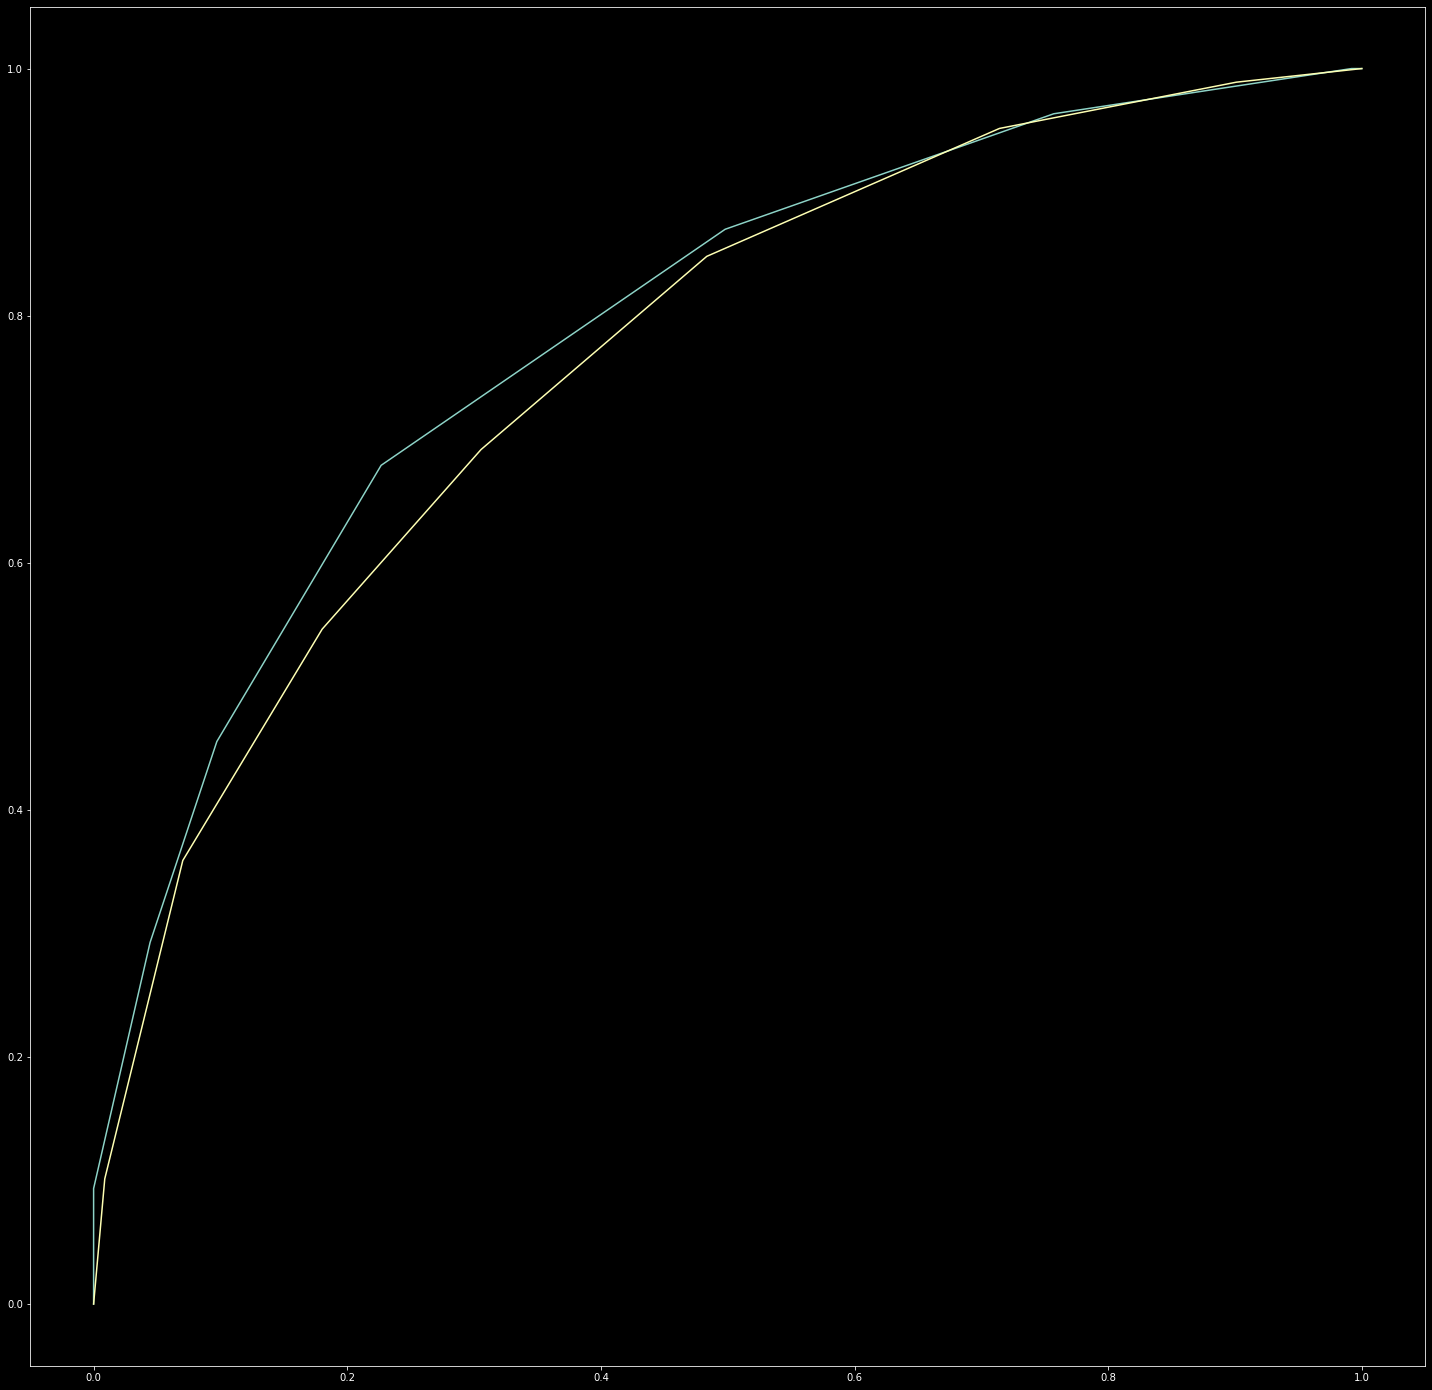

In [355]:
# Exercise 3.3.3 
# Find Thresholds that lead to the closest points for the two groups on the ROC curve

# Exercise 3.3.3 a) regular plot

#This function takes as an input y, y_probs, thr 
#and returns the points to plot the ROC curve and their threshold
def roc_curve(y_test, y_prob, ths):
  #initialize roc as an empty np.array
  roc = np.array([])
  #loop over thresholds
  #convert y_prob in y_hat
  y_hat = auc_roc_graph_array(ths, y_prob)
  #compute TPR and FPR
  TPR, FPR = TPR_FPR(y_hat, y_test)
  for counter, th in enumerate(ths):
    #add threshold and point to roc array
    roc = np.append(roc, [th, FPR[counter], TPR[counter]])
  #return roc
  return roc.reshape(-1, 3)

# calculate values and plot

Caucasians_roc_curve_values = roc_curve(y_test = y_Caucasians_test, y_prob = y_Causiansians_prob, ths = ths)
African_American_roc_curve_values = roc_curve(y_test = y_African_American_test, y_prob = y_African_American_prob, ths = ths)

plt.figure(figsize=(25,25))
plt.plot(Caucasians_roc_curve_values[:,1], Caucasians_roc_curve_values[:,2])
plt.plot(African_American_roc_curve_values[:,1], African_American_roc_curve_values[:,2])


#This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order 
  
def closest_points(points1, points2):
  #initialize result
  res = list()
  #loop over points in group 1
  for pi in points1:
    #loop over points in group 2
    for pj in points2:
      #add points and their distance to res
      res.append(((pi, pj), np.linalg.norm(pi[1:] - pj[1:])))
  #return sorted result
  return sorted(res, key = lambda x: x[1])

test = closest_points(Caucasians_roc_curve_values[:,[1,2]], African_American_roc_curve_values[:,[1,2]])

test

In [332]:
# Exercise 3.3.3 b) graphically with Bokeh

# roc_curves
roc_ca = roc_curve(y_test = y_Caucasians_test, y_prob = y_Causiansians_prob, ths = ths)
roc_aa = roc_curve(y_test = y_African_American_test, y_prob = y_African_American_prob, ths = ths)

roc_curves = pd.DataFrame({'FPR_AA':roc_aa[:,1], 'TPR_AA':roc_aa[:,2], 'FPR_CA':roc_ca[:,1], 'TPR_CA':roc_ca[:,2]})

roc_curves = ColumnDataSource(roc_curves)

# 
# DataFrame with columns x, y, th where x is the combined list of FPR_AA and FPR_CA, 
# y is the combined list of TPR_AA and TPR_CA, and th 

thresholds = pd.DataFrame({'x':np.concatenate((roc_aa[:,1], roc_ca[:,1])), 'y':np.concatenate((roc_aa[:,2], roc_ca[:,2])),\
    'th':np.concatenate((roc_aa[:,0], roc_ca[:,0]))})
thresholds = ColumnDataSource(thresholds)

# plotting

from bokeh.models.tools import WheelZoomTool 

p = figure(tools='hover', title = 'ROC Curves')
p.line('FPR_AA', 'TPR_AA', source = roc_curves, legend_label = 'African-American')
p.line('FPR_CA', 'TPR_CA', source = roc_curves, color = 'green', legend_label = 'Caucasians')
p.circle('x','y',source=thresholds, fill_color = 'red', hover_fill_color = 'pink') 

hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("FPR", "@x"),
    ("TPR", '@y'),
    ('Threshold', '@th')
    ]

p.add_layout(Title(text="FPR", align="center"), "below")
p.add_layout(Title(text="TPR", align="center"), "left")

p.legend.location = "top_left"
p.legend.click_policy="hide"

p.add_tools(WheelZoomTool())


show(p)
output_notebook()

Loading BokehJS ...

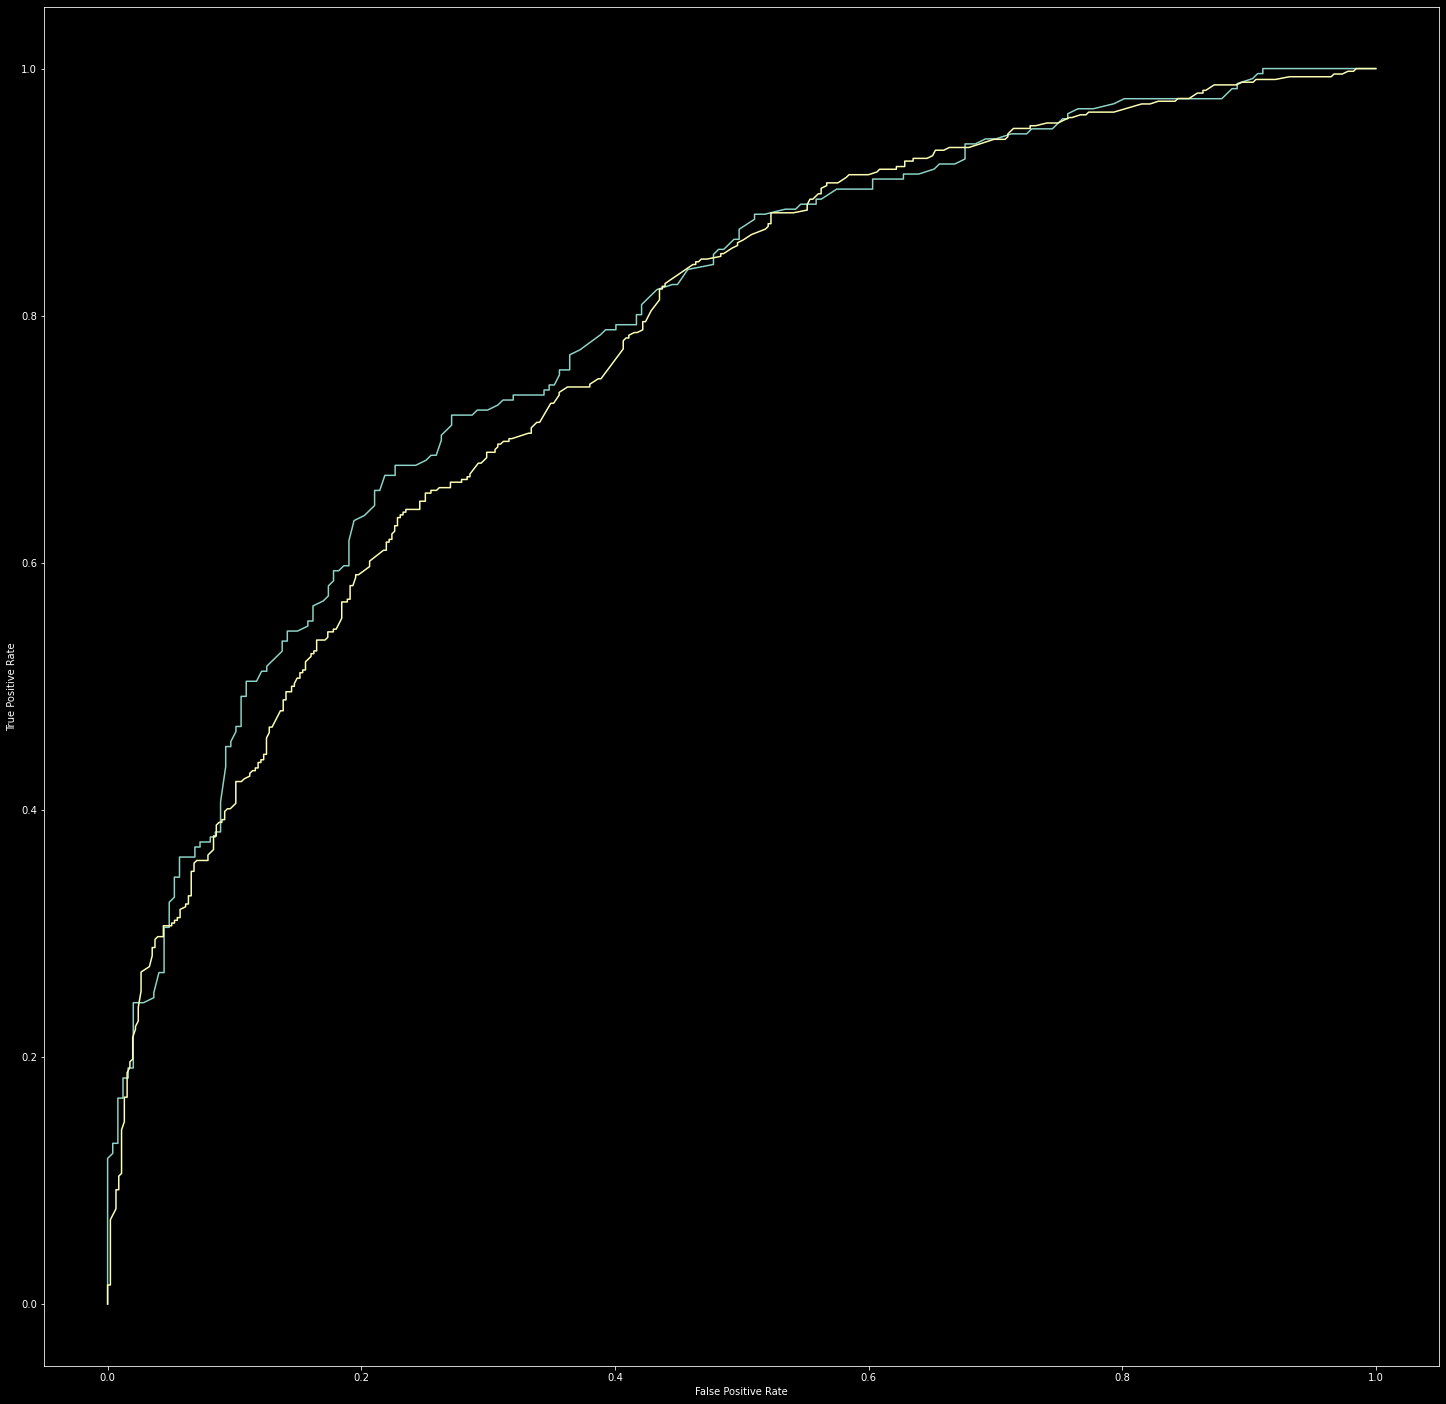

In [275]:
# Exercise 3.3.3 addition -> simpler way, but not asked in task

fpr, tpr, _ = metrics.roc_curve(y_Caucasians_test, y_Causiansians_prob)
fpr_2, tpr_2, _ = metrics.roc_curve(y_African_American_test, y_African_American_prob)

#create ROC curve
plt.figure(figsize=(25,25))
plt.plot(fpr,tpr)
plt.plot(fpr_2,tpr_2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Exercise 3.3.3: Use the two methods above to find a threshold for each group. What threshold did you find?**
<br> the closest points with the same threshold or

<br> balanced TPR and FPR -> otherwise bad classifier -> intersections close to the "ends" of the graphs are a bad choice
<br> so find a balance between a good classifier (balanced TPR and FPR) and minimize distance between points of the different thresholds (maximize fairness of the algorithm) -> weigh up different options (second lecture video of Week 7: 27:45 min)

<br> Threshold African-American: 0.4444 -> rather high TPR: 0.848
<br> Threshold Caucasians: 0.3333 -> rather high TPR: 0.87
<br> balance as distance is rather small, but TPRs are high -> alternatively high FPR possible, but larger distance -> the largest distance if really balanced TPRs

<br> In many applications(e.g. hiring), people care more about the true positive rate than true negative rate so many works focus on the following relaxed version:?? https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb

In [362]:
# Exercise 3.3.4 Debias the output by computing y_pred for the two groups with the thresholds you found. 
# Now plot the confusion matrices for African-Americans and Caucasian again. 

Caucasians_auc_roc_graph_array = auc_roc_graph_array(ths, y_Causiansians_prob)
African_American_auc_roc_graph_array = auc_roc_graph_array(ths, y_African_American_prob)

th_African_American = ths[4]
th_Caucasians = ths[3]

y_hat_Afrian_American = African_American_auc_roc_graph_array[:,4]
y_hat_Caucasians = Caucasians_auc_roc_graph_array[:,3]

# NOT PLOTTED -> EXERCISE WANTS A PLOT can be done with an heatmap by sns e.g.

print('Equal Odds Caucasians: ')
print(pd.crosstab(y_Caucasians_test, y_hat_Caucasians, rownames=['Actual'], colnames=['Predicted']))

print('Equal OddsAfrican American: ')
print(pd.crosstab(y_African_American_test, y_hat_Afrian_American, rownames=['Actual'], colnames=['Predicted']))

Equal Odds Caucasians: 
Predicted  0.0  1.0
Actual             
0          124  123
1           32  214
Equal OddsAfrican American: 
Predicted  0.0  1.0
Actual             
0          235  220
1           69  385


**Exercise 3.3.4 What do you observe?**
<br> a lot of false positive values + a lot of true negative values -> does this make sense in regards of the previous concern of high TPRs in regards to the chosen thresholds? in regards to the roc graph? 

**Exercise 3.4.5 We ended the video by saying that there might be still a problem with the methods we have used to de-bias data. What do you think the problem is? Hint: it is related to the following article. Skim through it to get an idea!**
<br> some groups have special rights on order to protect minorities, but if we drop the feature (or feature combination) containing this information, we loose a logical connection between the decision and the person -> it also makes it harder to compare ethnical groups, if they have different rights as we try to make them equal by applying these methods



<br> "Flaws:
It may not help closing the gap between two groups. For example, imagine group A has 100 applicants and 58 of them are qualified while group B also have 100 applicants but only 2 of them are qualified. If the company decides to accept 30 applicants and satisfies equality of opportunities, 29 offers will be conferred to group A while only 1 offer will be conferred to group B. If the job is a well-paid job, group A tends to have a better living condition and affords better education for their kids, and thus enable them to be qualified for such well-paid jobs when they grow up. The gap between group A and group B will tend to be enlarged over time."https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb

---
Well done! It is now time for you to have a break, relax and be proud of the awesome work you have done!! But before you go, please take a minute of your time (it is really one minute) to fill this [form](https://forms.gle/fbUXFxmJ283cKGvy6). Thank you so much! 